# Regression methods

## Custom Linear Regression

In [2]:
import numpy as np


np.random.seed(42)

x = np.random.randn(1, 100)
a, b = 2, 1
eps = .1 * np.random.randn(1, 100)
y = b + a * x + eps

x.shape, y.shape

((1, 100), (1, 100))

In [4]:
new_ind = np.arange(100)

np.random.shuffle(new_ind)
new_ind

array([98, 91, 36, 44, 67, 21, 19, 29, 82,  5, 40, 48, 14, 62, 13, 53, 26,
       55, 92, 54, 74, 90, 27, 17, 37, 77, 35, 46, 63, 73,  8,  4, 41, 20,
       24, 81, 10, 78,  6, 85, 58, 59, 52, 56,  7, 25, 16, 88, 70, 71, 66,
       96, 45, 30, 64, 12, 28, 43, 65, 83, 39, 79, 80,  2, 72, 42, 50, 60,
       69, 99, 34, 49, 11, 76, 31,  1, 23, 95,  3, 86,  0, 57, 18, 87, 51,
       33, 97,  9, 22, 32, 38, 84, 47, 94, 89, 15, 75, 68, 61, 93])

In [5]:
train_idx = new_ind[:70]
test_idx = new_ind[70:]

x_train, y_train = x[0][train_idx], y[0][train_idx]
x_test, y_test = x[0][test_idx], y[0][test_idx]

In [8]:
import matplotlib.pyplot as plt


def plot_line_or_scatter(type_plot, x_data, y_data, x_label='', y_label='', title='', color='r', yscale_log=False):
    _, ax = plt.subplots()

    if type_plot == 'scatter':
        ax.scatter(x_data, y_data, s=10, color=color, alpha=1)
    else:
        ax.plot(x_data, y_data, lw=2, color=color, alpha=1)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

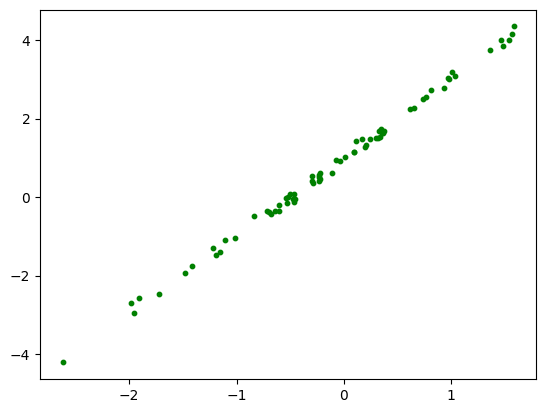

In [11]:
plot_line_or_scatter('scatter', x_train, y_train, color='green')

In [13]:
a = np.random.randn(1)
a

array([-0.12452525])

In [20]:
b = np.random.rand(1)
b

array([0.2127279])

In [43]:
lr = 1e-3       # learning-rate
epochs = 1000

### Fitting the Regression Model on MSE

In [47]:
Loss = []
for ep in range(epochs):
    y_pred = b + a * x_train
    error = y_pred - y_train
    loss = (error ** 2).mean()
    Loss.append(loss)
    b_grad = 2 * error.mean()
    a_grad = 2 * (x_train * error).mean()

    a = a - lr * a_grad
    b = b - lr * b_grad

    if ep % 20 == 0 or ep == epochs - 1:
        print('ep: %3d loss: %8.6f a=%4.3f b=%4.3f' % (ep, loss, a, b))

ep:   0 loss: 0.012099 a=1.944 b=0.982
ep:  20 loss: 0.011973 a=1.946 b=0.983
ep:  40 loss: 0.011855 a=1.947 b=0.984
ep:  60 loss: 0.011744 a=1.948 b=0.984
ep:  80 loss: 0.011640 a=1.950 b=0.985
ep: 100 loss: 0.011542 a=1.951 b=0.986
ep: 120 loss: 0.011450 a=1.952 b=0.986
ep: 140 loss: 0.011364 a=1.953 b=0.987
ep: 160 loss: 0.011283 a=1.954 b=0.987
ep: 180 loss: 0.011207 a=1.956 b=0.988
ep: 200 loss: 0.011135 a=1.957 b=0.988
ep: 220 loss: 0.011068 a=1.958 b=0.989
ep: 240 loss: 0.011005 a=1.959 b=0.989
ep: 260 loss: 0.010946 a=1.960 b=0.990
ep: 280 loss: 0.010890 a=1.961 b=0.990
ep: 300 loss: 0.010838 a=1.961 b=0.991
ep: 320 loss: 0.010789 a=1.962 b=0.991
ep: 340 loss: 0.010743 a=1.963 b=0.992
ep: 360 loss: 0.010700 a=1.964 b=0.992
ep: 380 loss: 0.010659 a=1.965 b=0.993
ep: 400 loss: 0.010621 a=1.966 b=0.993
ep: 420 loss: 0.010586 a=1.966 b=0.993
ep: 440 loss: 0.010552 a=1.967 b=0.994
ep: 460 loss: 0.010520 a=1.968 b=0.994
ep: 480 loss: 0.010491 a=1.969 b=0.994
ep: 500 loss: 0.010463 a=

C:\Users\Иван\AppData\Local\Temp\ipykernel_3128\2372233077.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d loss: %8.6f a=%4.3f b=%4.3f' % (ep, loss, a, b))


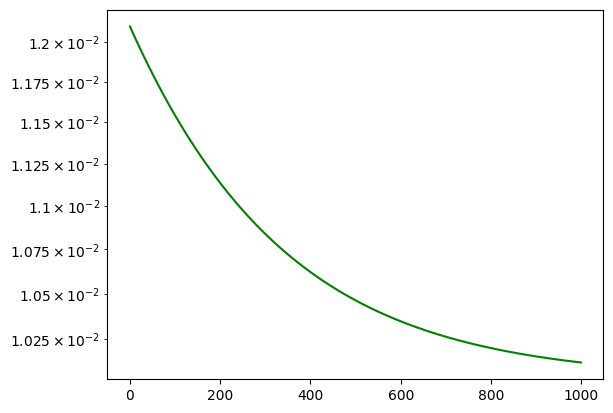

In [48]:
plt.plot(np.arange(epochs), Loss, color='green')
plt.yscale('log')

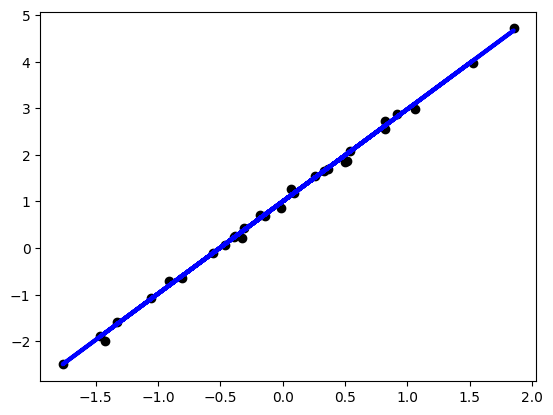

In [49]:
y_test_pred = b + a * x_test
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

## Linear Regression with Scikit-Learn

In [50]:
from sklearn.datasets import load_wine


data_wine = load_wine()
data_wine.target[[10, 80, 140]]

array([0, 1, 2])

In [52]:
list(data_wine.target_names)

[np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]

In [55]:
X = data_wine.data
y = data_wine.target
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [56]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [61]:
y_test, X_train[:3]

(array([1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0,
        1, 0, 1, 2, 1, 1, 0, 1, 1, 0]),
 array([[1.386e+01, 1.350e+00, 2.270e+00, 1.600e+01, 9.800e+01, 2.980e+00,
         3.150e+00, 2.200e-01, 1.850e+00, 7.220e+00, 1.010e+00, 3.550e+00,
         1.045e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.242e+01, 4.430e+00, 2.730e+00, 2.650e+01, 1.020e+02, 2.200e+00,
         2.130e+00, 4.300e-01, 1.710e+00, 2.080e+00, 9.200e-01, 3.120e+00,
         3.650e+02]]))

In [64]:
from sklearn.linear_model import LinearRegression


lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f}')
print(f'Множители a={lin_clf.coef_}')

Обученные параметры: 
Смещение b=3.0476
Множители a=[-1.13028527e-01  1.60250909e-02 -2.72664329e-03  4.28953230e-02
  1.29630464e-04  1.75523809e-01 -3.96035514e-01 -2.14170323e-01
  2.60194668e-02  7.60498584e-02 -1.94768993e-01 -2.73607335e-01
 -7.47144425e-04]


0.8615963489732433


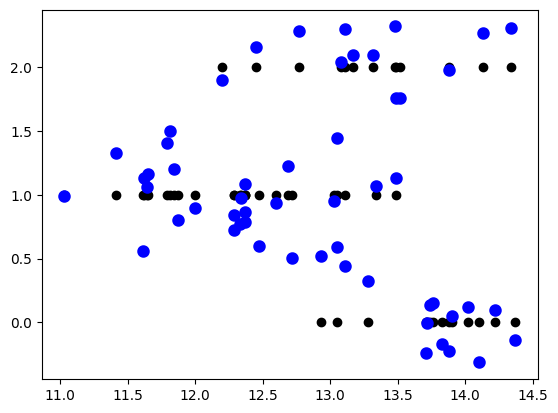

In [67]:
y_predicted = lin_clf.predict(X_test)
score = lin_clf.score(X_test, y_test)
print(score)

i = 0
plt.scatter(X_test[:, i], y_test, color='black')
plt.scatter(X_test[:, i], y_predicted, color='blue', linewidth=3)

In [68]:
y_pred_class = np.rint(y_predicted)
y_pred_class[y_pred_class > 2] = 2
y_pred_class[y_pred_class < 0] = 0
y_pred_class = y_pred_class.astype('int')
score = np.sum(y_pred_class == y_test) / len(y_test)
score

np.float64(0.9444444444444444)

## Logistic Regression

### Logistic Function (Sigmoid)

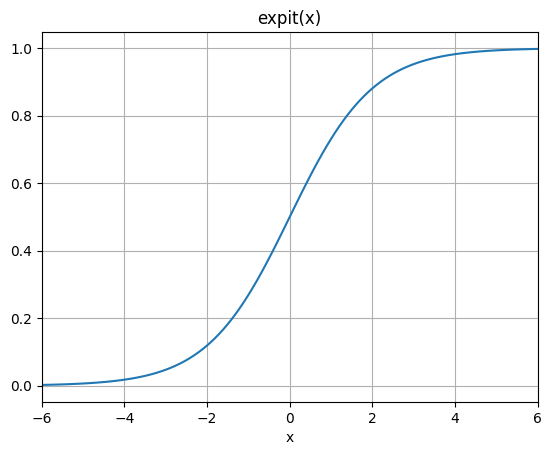

In [72]:
from scipy.special import expit

x = np.linspace(-6, 6, 121)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

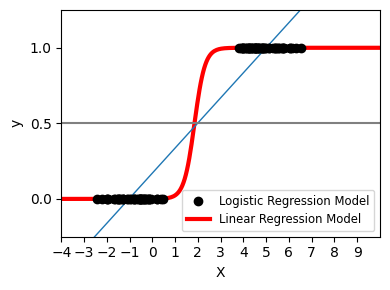

In [76]:
from sklearn import linear_model


n_samples = 100
np.random.seed(0)

X = 1 * np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] += 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

log_reg = linear_model.LogisticRegression(C=1e5, max_iter=200)
log_reg.fit(X, y)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)

X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * log_reg.coef_ + log_reg.intercept_).ravel()
loss1 = log_reg.predict_proba(X_test[:, np.newaxis])[:, 1].ravel()
plt.plot(X_test, loss1, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)

plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, .5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()